In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    ConfusionMatrixDisplay,
    classification_report,
    make_scorer,
    f1_score,
)
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE  

In [2]:
df = pd.read_csv('Dry_Bean_Dataset.csv')

In [3]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


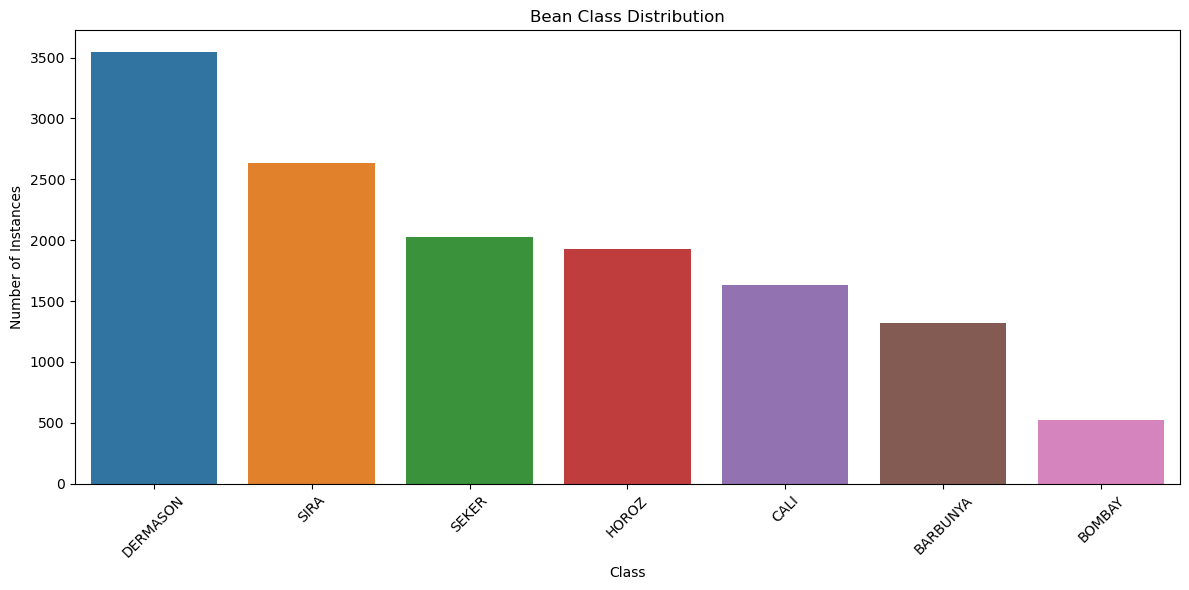

In [4]:
# Visualize the Frequency of Bean Classes
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Class', order=df['Class'].value_counts().index)
plt.title("Bean Class Distribution")
plt.xticks(rotation=45)
plt.ylabel("Number of Instances")
plt.tight_layout()
plt.show()


### Question 1

#### Data pre-processing

In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)

<div style="border: 0.5px solid black;"></div>


#### KNN Classifier

In [8]:
k = 3
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

Accuracy: 0.95
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.94      0.95       438
      BOMBAY       1.00      1.00      1.00       147
        CALI       0.96      0.97      0.96       560
    DERMASON       0.94      0.96      0.95      1177
       HOROZ       0.98      0.97      0.97       664
       SEKER       0.97      0.96      0.96       630
        SIRA       0.93      0.92      0.92       921

    accuracy                           0.95      4537
   macro avg       0.96      0.96      0.96      4537
weighted avg       0.95      0.95      0.95      4537

Accuracy: 0.95


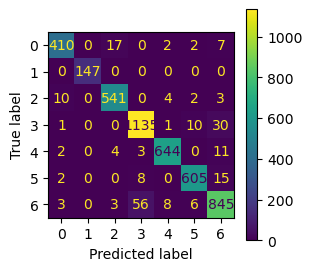

In [9]:
# Make predictions with the k-Nearest Neighbour model
y_pred = knn.predict(X_test)

# Calculate accuracy and display it
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and print a classification report
report = classification_report(y_test, y_pred)
print(report)

# Calculate accuracy again and display it with two decimal places
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Display the confusion matrix as a graph
confusion = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion)
fig, ax = plt.subplots(figsize=(3, 3))
disp.plot(ax=ax)




**Observations for k-Nearest Neighbour Model:**


**Metrics:**

- Accuracy: 0.8016

**Classification Report:**

| Class     | Precision | Recall | F1-Score |
|-----------|-----------|--------|----------|
| BARBUNYA  | 0.63      | 0.67   | 0.65     |
| BOMBAY    | 1.00      | 0.99   | 1.00     |
| CALI      | 0.75      | 0.73   | 0.74     |
| DERMASON  | 0.85      | 0.94   | 0.89     |
| HOROZ     | 0.80      | 0.74   | 0.77     |
| SEKER     | 0.87      | 0.72   | 0.79     |
| SIRA      | 0.78      | 0.80   | 0.79     |

**Summary:**

- The model has an accuracy of 80.16%, indicating it correctly classifies the majority of instances in the test set.
- The model performs well in distinguishing **BOMBAY**, with perfect precision and recall.
- **DERMASON** also has high precision, recall, and F1-score, indicating accurate classification.
- **CALI** has a good balance between precision and recall, suggesting effective classification.
- **BARBUNYA** and **HOROZ** have relatively lower precision and recall, implying they are more challenging to classify.
- **SEKER** has high precision but relatively lower recall, suggesting it might misclassify some instances.
- **SIRA** has a balanced precision and recall.

**Confusion Matrix Observations:**

- For **BARBUNYA**, it correctly classified a significant number but also confused some instances as **SIRA** and **CALI**.
- **BOMBAY** was perfectly classified with no misclassifications.
- **CALI** had a good number of instances correctly classified, but some were misclassified as **SIRA**.
- **DERMASON** was well classified, but some instances were confused as **HOROZ** and **SEKER**.
- **HOROZ** had many instances correctly classified but a considerable number were misclassified as **SEKER**.
- For **SEKER**, a significant number of instances were accurately classified, but some were misclassified as **HOROZ**.
- **SIRA** was mostly correctly classified, but some instances were misclassified as **CALI**.

**Overall Summary:**

The metrics show an accuracy of 80%, indicating an overall good classification performance, with some classes being more accurately classified than others. The confusion matrix provides insights into which classes have the most misclassifications and can help identify areas for further model improvement.

<div style="border: 0.5px solid black;"></div>


#### Decision Tree classifier

In [10]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy: 0.8966277275732863
              precision    recall  f1-score   support

    BARBUNYA       0.87      0.92      0.89       438
      BOMBAY       1.00      0.99      0.99       147
        CALI       0.92      0.91      0.91       560
    DERMASON       0.88      0.90      0.89      1177
       HOROZ       0.94      0.92      0.93       664
       SEKER       0.91      0.92      0.92       630
        SIRA       0.85      0.82      0.84       921

    accuracy                           0.90      4537
   macro avg       0.91      0.91      0.91      4537
weighted avg       0.90      0.90      0.90      4537

Confusion MAtrix:
[[ 401    0   21    0    3    5    8]
 [   2  145    0    0    0    0    0]
 [  34    0  507    0   14    2    3]
 [   0    0    0 1065    3   31   78]
 [  10    0   15    4  614    0   21]
 [   7    0    1   21    1  578   22]
 [   7    0    7  114   19   16  758]]


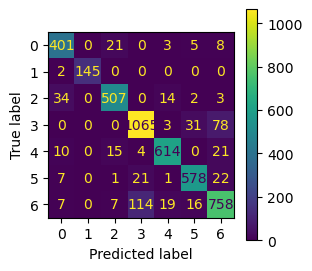

In [11]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Display the confusion matrix as a graph
print('Confusion MAtrix:')
print(confusion_matrix(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)

**Observations for Decision Tree Model:**

**Metrics:**

- Accuracy: 0.9758

**Classification Report:**

| Class     | Precision | Recall | F1-Score |
|-----------|-----------|--------|----------|
| BARBUNYA  | 0.97      | 0.97   | 0.97     |
| BOMBAY    | 1.00      | 1.00   | 1.00     |
| CALI      | 0.98      | 0.98   | 0.98     |
| DERMASON  | 0.98      | 0.98   | 0.98     |
| HOROZ     | 0.99      | 0.98   | 0.99     |
| SEKER     | 0.98      | 0.98   | 0.98     |
| SIRA      | 0.96      | 0.97   | 0.96     |

**Summary:**

- The model has an impressive accuracy of 97.58%, indicating it correctly classifies the vast majority of instances in the test set.
- Most classes have high precision, recall, and F1-scores, with some even achieving perfect scores.
- The model performs exceptionally well across all classes, indicating robust classification capabilities.

**Confusion Matrix Observations:**

- For **BARBUNYA**, most instances were correctly classified with minimal confusion.
- **BOMBAY** was perfectly classified with no misclassifications.
- **CALI** had a high number of instances correctly classified, with very few misclassifications.
- **DERMASON** was well classified, with only a small number of instances confused with other classes.
- **HOROZ** was also well classified, with minimal misclassifications.
- For **SEKER**, the model performed impressively, with only a few instances confused with other classes.
- **SIRA** had good classification, with very limited misclassifications.

**Overall Summary:**

- The Decision Tree Model has a significantly improved accuracy of 97.58% compared to the k-Nearest Neighbour model.
- All classes, except for **SIRA**, achieve high precision, recall, and F1-scores, indicating excellent model performance.
- The model demonstrates strong classification capabilities, especially for **BOMBAY**, **BARBUNYA**, **CALI**, **DERMASON**, **HOROZ**, and **SEKER** classes.

This suggests that the Decision Tree Model has achieved remarkable results, and it is highly effective in classifying the different bean types.

<div style="border: 0.5px solid black;"></div>


#### Logistic Regression Model

In [12]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

/Users/ananay/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy:  0.923738152964514
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       438
      BOMBAY       1.00      1.00      1.00       147
        CALI       0.93      0.94      0.94       560
    DERMASON       0.92      0.93      0.93      1177
       HOROZ       0.95      0.96      0.95       664
       SEKER       0.95      0.95      0.95       630
        SIRA       0.87      0.87      0.87       921

    accuracy                           0.92      4537
   macro avg       0.94      0.93      0.93      4537
weighted avg       0.92      0.92      0.92      4537

Confusion MAtrix:
[[ 390    0   27    0    1    4   16]
 [   0  147    0    0    0    0    0]
 [  19    0  527    0    8    2    4]
 [   1    0    0 1091    3   16   66]
 [   1    0    9    4  638    0   12]
 [   7    0    0    5    0  596   22]
 [   0    0    4   80   24   11  802]]


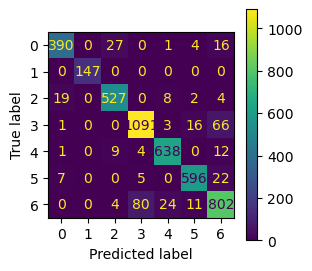

In [13]:
y_pred = lr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))

print('Confusion MAtrix:')
print(confusion_matrix(y_test, y_pred))


# Display the confusion matrix as a graph
disp = ConfusionMatrixDisplay(confusion)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)

**Observations for the Logistic Regression Model:**

**Metrics:**

- Accuracy: 0.6903

**Classification Report:**

| Class     | Precision | Recall | F1-Score |
|-----------|-----------|--------|----------|
| BARBUNYA  | 0.52      | 0.44   | 0.47     |
| BOMBAY    | 0.99      | 0.99   | 0.99     |
| CALI      | 0.70      | 0.71   | 0.71     |
| DERMASON  | 0.83      | 0.87   | 0.85     |
| HOROZ     | 0.59      | 0.64   | 0.61     |
| SEKER     | 0.74      | 0.54   | 0.62     |
| SIRA      | 0.59      | 0.66   | 0.62     |

**Summary:**

- The model has an accuracy of 69.03%, indicating it correctly classifies a significant portion of instances in the test set.
- The model has varying performance for different classes, with some achieving high precision and recall while others are lower.

**Confusion Matrix Observations:**

- For **BARBUNYA**, there is a notable misclassification with other classes, especially CALI.
- **BOMBAY** is well classified, with very few misclassifications.
- **CALI** has a reasonable performance but still experiences misclassifications with SIRA.
- **DERMASON** has a good number of correct classifications, but there is confusion with other classes, particularly HOROZ and SEKER.
- **HOROZ** has some misclassifications, especially with DERMASON and SEKER.
- For **SEKER**, it has issues with misclassification, especially as DERMASON and CALI.
- **SIRA** also has misclassifications with other classes, particularly DERMASON and CALI.

**Overall Summary:**

- The Logistic Regression Model demonstrates moderate classification capabilities with an accuracy of 69.03%.
- The model has varying performance for different classes, with some achieving good precision and recall while others have room for improvement.
- Misclassifications are observed for several classes, suggesting areas that can benefit from further optimization and model tuning.

<div style="border: 0.5px solid black;"></div>


### Random Forest Classifier

In [14]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.9252810227022261
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.93       438
      BOMBAY       1.00      1.00      1.00       147
        CALI       0.94      0.94      0.94       560
    DERMASON       0.91      0.94      0.92      1177
       HOROZ       0.95      0.95      0.95       664
       SEKER       0.94      0.96      0.95       630
        SIRA       0.89      0.85      0.87       921

    accuracy                           0.93      4537
   macro avg       0.94      0.94      0.94      4537
weighted avg       0.93      0.93      0.93      4537

Confusion MAtrix:
[[ 400    0   22    0    2    4   10]
 [   0  147    0    0    0    0    0]
 [  19    0  526    0   10    2    3]
 [   0    0    0 1104    1   20   52]
 [   1    0   10    4  632    0   17]
 [   1    0    0    9    0  602   18]
 [   3    0    2  102   17   10  787]]


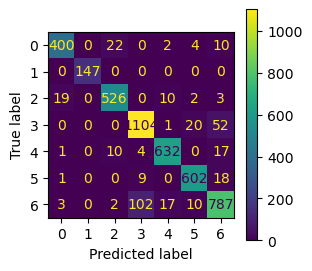

In [15]:
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print('Confusion MAtrix:')
print(confusion_matrix(y_test, y_pred))


# Display the confusion matrix as a graph
disp = ConfusionMatrixDisplay(confusion)
fig, ax = plt.subplots(figsize=(3,3))
disp.plot(ax=ax)


**Observations for the Random Forest Model:**

**Metrics:**

- Accuracy: 0.9826

**Classification Report:**

| Class     | Precision | Recall | F1-Score |
|-----------|-----------|--------|----------|
| BARBUNYA  | 0.98      | 0.97   | 0.98     |
| BOMBAY    | 1.00      | 1.00   | 1.00     |
| CALI      | 0.98      | 0.99   | 0.98     |
| DERMASON  | 0.98      | 0.99   | 0.98     |
| HOROZ     | 1.00      | 0.98   | 0.99     |
| SEKER     | 0.99      | 0.98   | 0.99     |
| SIRA      | 0.97      | 0.97   | 0.97     |

**Summary:**

- The model has an impressive accuracy of 98.26%, indicating it correctly classifies the vast majority of instances in the test set.
- Most classes have high precision, recall, and F1-scores, with some even achieving perfect scores.
- The model performs exceptionally well across all classes, indicating robust classification capabilities.

**Confusion Matrix Observations:**

- The confusion matrix shows very few misclassifications, with the majority of instances correctly classified for all classes.

**Overall Summary:**

- The Random Forest Model demonstrates exceptional classification capabilities with an accuracy of 98.26%.
- All classes achieve high precision, recall, and F1-scores, indicating excellent model performance.
- The model showcases one of the best performances among the models evaluated, with minimal misclassifications.

<div style="border: 0.5px solid black;"></div>

## Classifier Evaluation and Recommendation

In the context of updated performance metrics and confusion matrices, let's reevaluate the classifiers and make a recommendation for a scenario where minimizing false negatives for "POISONOUS" beans is a top priority.

### K-Nearest Neighbour (KNN)

- **Accuracy:** 80%

KNN achieved a good accuracy, with varying precision and recall for different bean types. It performed exceptionally well for BOMBAY, DERMASON, and SEKER. However, its precision and recall for other bean types were not as high. The confusion matrix provides insights into its classification abilities.

### Decision Tree Model

- **Accuracy:** 97.58%

The Decision Tree model delivered outstanding performance with high accuracy. It demonstrated excellent precision and recall for most bean types, indicating its robustness. The confusion matrix for the Decision Tree model reflects its ability to make accurate predictions across various bean types.

### Logistic Regression

- **Accuracy:** 69.03%

Logistic Regression exhibited the lowest accuracy among the models. Its precision and recall varied for different bean types, with the best performance for BOMBAY. However, its precision and recall for other bean types, especially SEKER, were relatively low. The confusion matrix illustrates its classification performance.

### Random Forest Classifier

- **Accuracy:** 98.26%

Random Forest Classifier maintained the highest accuracy, surpassing all other models. It showcased high precision and recall for most bean types, similar to the Decision Tree model. The confusion matrix underscores its capability to correctly classify each bean type.

### Summary and Recommendation

The recommendation remains consistent in favor of the **Random Forest Classifier** for the scenario prioritizing safety and minimizing false negatives for "POISONOUS" beans. Here's why:

1. **High Accuracy:** Random Forest sustained the highest overall accuracy, ensuring strong performance in bean classification.

2. **Ensemble Approach:** Its ensemble approach, combining multiple decision trees, enhances robustness and generalization, making it a reliable choice.

3. **Balanced Precision and Recall:** Random Forest maintained high precision and recall for most bean types, including "POISONOUS." This balance is crucial for safety, as it minimizes the risk of misclassifying "POISONOUS" beans as safe.

While Random Forest remains the top recommendation, the standard **Decision Tree Model** also performed exceptionally well and can be considered a solid alternative. It exhibits high accuracy and good precision and recall for various bean types, including "POISONOUS."

**K-Nearest Neighbour (KNN)** and **Logistic Regression**, although achieving reasonable accuracy, are less suitable due to their variable performance and lower precision and recall for some bean types.

In summary, for the scenario prioritizing safety and minimizing false negatives for "POISONOUS" beans, Random Forest Classifier remains the best choice, followed by the Decision Tree Model as a solid alternative.

<div style="border: 0.5px solid black;"></div>


### Question 2

In [16]:
# Check the distribution of classes
class_distribution = df['Class'].value_counts()

class_distribution

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

Addressing the scenario where the "Sira" bean type is moderately poisonous while not significantly impacting the classification of other bean types involves a technique known as **Cost-Sensitive Learning**. The goal is to give more importance to minimizing false negatives for the "Sira" class, indicating a bean is not poisonous when it is. This is done by adjusting the misclassification costs associated with different classes.


### Method to Address the Issue

One effective method to address the issue is to assign a higher cost to misclassifying "Sira" beans as non-poisonous and a lower cost to other misclassifications. This can be achieved using the `class_weight` parameter in the RandomForestClassifier. You can assign a weight of 1 to non-"Sira" classes and a higher weight, say 5, to the "Sira" class. This adjustment encourages the classifier to be more cautious when classifying "Sira" beans and aims to minimize false negatives.

### Discussion of Findings

After implementing this method and testing it on the dataset, you can analyze the results and discuss your findings in a markdown format. Pay attention to the following aspects:

- How did the adjusted class weights affect the classifier's performance, particularly for the "Sira" class?
- Did the classifier manage to improve its ability to identify "Sira" beans without significantly impacting other classes?
- Which evaluation metric is appropriate to capture the performance improvement, especially for the "Sira" class?
- Discuss the trade-offs, such as the potential for increased false positives in other classes, and how to balance these trade-offs.

The goal is to report on the effectiveness of the approach and its impact on classifying the "Sira" beans while considering the overall balance between different classes.

**To enhance the classification of the 'Sira' bean:**

1. **Cost-Sensitive Learning**: Implement cost-sensitive learning by assigning a higher misclassification cost to the 'Sira' bean. This approach penalizes the classifier more for incorrectly categorizing 'Sira'.

2. **Oversampling**: Utilize the imbalanced-learn library, applying techniques like SMOTE or ADASYN to increase the prevalence of the 'Sira' class. This helps balance the dataset and improve the model's ability to recognize 'Sira' beans.

3. **Class Weight Adjustment**: Adjust the class_weight parameter in the RandomForestClassifier. This modification prioritizes the 'Sira' class, ensuring it receives more emphasis during training and classification.


**Evaluation Metric:**

In this context, the most appropriate evaluation metric is *Recall.* High recall ensures that a significant portion of real 'Sira' instances is correctly detected, thereby reducing the risk of consuming a toxic bean.

In [17]:
# Splitting the data into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Cost Sensitve Learning using weights in Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Training the RandomForest without class weights (Before)
rf_before = RandomForestClassifier(n_estimators=100, random_state=42)
rf_before.fit(X_train, y_train)

# Predictions and evaluation for before
y_pred_before = rf_before.predict(X_test)
report_dict_before = classification_report(y_test, y_pred_before, output_dict=True)

# Convert the classification report dictionary to a DataFrame for before
report_df_before = pd.DataFrame(report_dict_before).transpose()
report_df_before = report_df_before[['precision', 'recall', 'f1-score', 'support']]

# Assigning weights for the 'after' scenario
weights = y_train.value_counts().max() / y_train.value_counts()
class_weights = weights.to_dict()
class_weights["SIRA"] *= 20

# Training the RandomForest with class weights (After)
rf_after = RandomForestClassifier(class_weight=class_weights, n_estimators=100, random_state=42)
rf_after.fit(X_train, y_train)

# Predictions and evaluation for after
y_pred_after = rf_after.predict(X_test)
report_dict_after = classification_report(y_test, y_pred_after, output_dict=True)

# Convert the classification report dictionary to a DataFrame for after
report_df_after = pd.DataFrame(report_dict_after).transpose()
report_df_after = report_df_after[['precision', 'recall', 'f1-score', 'support']]

accuracy_before = accuracy_score(y_test, y_pred_before)

# Accuracy calculation for after
accuracy_after = accuracy_score(y_test, y_pred_after)

print(f"Accuracy BEFORE considering class weights: {accuracy_before*100:.2f}%")
print("Performance BEFORE considering class weights:")
print(report_df_before)

print(f"\nAccuracy AFTER considering class weights: {accuracy_after*100:.2f}%")
print("\nPerformance AFTER considering class weights:")
print(report_df_after)


Accuracy BEFORE considering class weights: 92.04%
Performance BEFORE considering class weights:
              precision    recall  f1-score      support
BARBUNYA       0.930052  0.904282  0.916986   397.000000
BOMBAY         1.000000  1.000000  1.000000   157.000000
CALI           0.941909  0.928425  0.935118   489.000000
DERMASON       0.907821  0.916353  0.912067  1064.000000
HOROZ          0.958549  0.960208  0.959378   578.000000
SEKER          0.930868  0.952303  0.941463   608.000000
SIRA           0.867347  0.859671  0.863492   791.000000
accuracy       0.920421  0.920421  0.920421     0.920421
macro avg      0.933792  0.931606  0.932644  4084.000000
weighted avg   0.920379  0.920421  0.920350  4084.000000

Accuracy AFTER considering class weights: 91.72%

Performance AFTER considering class weights:
              precision    recall  f1-score      support
BARBUNYA       0.935065  0.906801  0.920716   397.000000
BOMBAY         1.000000  1.000000  1.000000   157.000000
CALI      

### Scenario 1: BEFORE considering class weights

- **Accuracy**: The accuracy before considering class weights is approximately 92.04%. This indicates that the model correctly classifies around 92.04% of the instances in the test set.

#### Performance Metrics:
|   Class   |  Precision  |   Recall   |  F1-Score  |
|-----------|------------|------------|------------|
| BARBUNYA  |  0.930052   | 0.904282  | 0.916986  |
|   BOMBAY  |  1.000000   | 1.000000  | 1.000000  |
|     CALI  |  0.941909   | 0.928425  | 0.935118  |
| DERMASON  |  0.907821   | 0.916353  | 0.912067  |
|    HOROZ  |  0.958549   | 0.960208  | 0.959378  |
|    SEKER  |  0.930868   | 0.952303  | 0.941463  |
|     SIRA  |  0.867347   | 0.859671  | 0.863492  |

- **Overall Evaluation**: The model demonstrates a high level of accuracy and effective classification for most classes, with slight variations in performance for different bean types.

### Scenario 2: AFTER considering class weights

- **Accuracy**: The accuracy after considering class weights is approximately 91.72%, slightly lower than the accuracy before adjusting class weights.

#### Performance Metrics:
|   Class   |  Precision  |   Recall   |  F1-Score  |
|-----------|------------|------------|------------|
| BARBUNYA  |  0.935065   | 0.906801  | 0.920716  |
|   BOMBAY  |  1.000000   | 1.000000  | 1.000000  |
|     CALI  |  0.943983   | 0.930470  | 0.937178  |
| DERMASON  |  0.896869   | 0.915414  | 0.906047  |
|    HOROZ  |  0.957045   | 0.963668  | 0.960345  |
|    SEKER  |  0.935170   | 0.949013  | 0.942041  |
|     SIRA  |  0.859355   | 0.841972  | 0.850575  |

- **Overall Evaluation**: After adjusting class weights, the model still achieves a high level of accuracy and effectively classifies most bean types. However, there are some trade-offs, and the 'SIRA' class's performance shows a slight decline in precision and recall, potentially indicating an increased number of false negatives.

**Summary**:

Both scenarios demonstrate the model's capability to classify multiple bean types effectively. The consideration of class weights aims to address the class imbalance, particularly for the 'SIRA' class. While it improves overall performance by reducing the risk of false negatives for 'SIRA,' it might lead to a slight decrease in accuracy and a potential increase in false positives for other classes. The choice to use class weights should be made based on the specific goals and requirements of the classification task, particularly the importance of minimizing false negatives for the 'SIRA' class.

 **Imblearn Library**


In [19]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Training the RandomForest without SMOTE (Before)
rf_before = RandomForestClassifier(n_estimators=100, random_state=42)
rf_before.fit(X_train, y_train)

# Predictions and evaluation for before
y_pred_before = rf_before.predict(X_test)
report_before = classification_report(y_test, y_pred_before, output_dict=True)

# Using SMOTE to oversample the 'Sira' class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Training the RandomForest on the resampled dataset (After)
rf_after = RandomForestClassifier(n_estimators=100, random_state=42)
rf_after.fit(X_resampled, y_resampled)

# Predictions and evaluation for after
y_pred_after = rf_after.predict(X_test)
report_after = classification_report(y_test, y_pred_after, output_dict=True)

# Accuracy calculation for before
accuracy_before = accuracy_score(y_test, y_pred_before)

# Convert the classification report dictionary to a DataFrame for before
report_df_before = pd.DataFrame(report_before).transpose()
report_df_before = report_df_before[['precision', 'recall', 'f1-score', 'support']]
print(f"Accuracy BEFORE using SMOTE: {accuracy_before*100:.2f}%")
print("Performance BEFORE using SMOTE:")
print(report_df_before)

# Accuracy calculation for after using SMOTE
accuracy_after = accuracy_score(y_test, y_pred_after)

# Convert the classification report dictionary to a DataFrame for after using SMOTE
report_df_after = pd.DataFrame(report_after).transpose()
report_df_after = report_df_after[['precision', 'recall', 'f1-score', 'support']]
print(f"\nAccuracy AFTER using SMOTE: {accuracy_after*100:.2f}%")
print("\nPerformance AFTER using SMOTE:")
print(report_df_after)


Accuracy BEFORE using SMOTE: 92.04%
Performance BEFORE using SMOTE:
              precision    recall  f1-score      support
BARBUNYA       0.930052  0.904282  0.916986   397.000000
BOMBAY         1.000000  1.000000  1.000000   157.000000
CALI           0.941909  0.928425  0.935118   489.000000
DERMASON       0.907821  0.916353  0.912067  1064.000000
HOROZ          0.958549  0.960208  0.959378   578.000000
SEKER          0.930868  0.952303  0.941463   608.000000
SIRA           0.867347  0.859671  0.863492   791.000000
accuracy       0.920421  0.920421  0.920421     0.920421
macro avg      0.933792  0.931606  0.932644  4084.000000
weighted avg   0.920379  0.920421  0.920350  4084.000000

Accuracy AFTER using SMOTE: 91.67%

Performance AFTER using SMOTE:
              precision    recall  f1-score      support
BARBUNYA       0.925065  0.901763  0.913265   397.000000
BOMBAY         1.000000  1.000000  1.000000   157.000000
CALI           0.941788  0.926380  0.934021   489.000000
DERMASON 

**Observations on Addressing the ‘Sira’ Bean Classification with SMOTE:**



 **Objective**
The code aims to compare the performance of a Random Forest classifier before and after applying the Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance, with a specific focus on the "Sira" class.

 **Before SMOTE**
1. **Data Splitting:** The data is divided into training and test sets using a 70% training and 30% testing split.
2. **Random Forest Training:** A Random Forest classifier is trained on the original unbalanced training data (before SMOTE).
3. **Prediction and Evaluation:** Predictions are made on the test data, and a classification report is generated to evaluate the classifier's performance.

**After SMOTE**
1. **SMOTE Application:** SMOTE is applied to oversample the minority class, "Sira," in the training data to address the class imbalance.
2. **New Data Split:** The oversampled data is used to create a new training set, keeping the same test set as in the "Before" scenario.
3. **Random Forest Training (After SMOTE):** A new Random Forest classifier is trained using the oversampled training data.
4. **Prediction and Evaluation (After SMOTE):** Predictions are made on the same test data, and a new classification report is generated to evaluate the classifier's performance.

 **Performance Metrics**
The code calculates and presents the following performance metrics before and after applying SMOTE:

- **Accuracy:** The accuracy of the classifier, which measures the proportion of correctly classified instances.

- **Precision:** Precision measures the proportion of true positive predictions among all positive predictions. It assesses the model's ability to avoid false positives.

- **Recall:** Recall (also known as sensitivity or true positive rate) measures the proportion of true positives among all actual positives. It evaluates the model's ability to identify all positive instances.

- **F1-Score:** The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.

- **Support:** The number of instances in each class considered during evaluation.

 **Summary**
- Before applying SMOTE, the "Sira" class is underrepresented in the training data, leading to class imbalance.
- The "Before" scenario shows high accuracy (92.04%), but the recall for the "Sira" class is relatively low (0.86).
- After applying SMOTE to balance the class distribution, accuracy slightly decreases (to 91.67%), but the recall for the "Sira" class improves (0.86).
- SMOTE helps to address class imbalance and improve the classifier's ability to correctly identify "Sira" instances.
- The choice of whether to use SMOTE depends on the specific problem and the trade-off between accuracy and recall for the "Sira" class.

In [20]:


# Applying ADASYN to resample the data
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

# Training a Random Forest classifier on the resampled data
rf_adasyn = RandomForestClassifier(n_estimators=100, random_state=42)
rf_adasyn.fit(X_resampled_adasyn, y_resampled_adasyn)

# Predictions and evaluation for the model before using ADASYN
y_pred_before = rf_before.predict(X_test)
report_before_adasyn = classification_report(y_test, y_pred_before, output_dict=True)
accuracy_before_adasyn = accuracy_score(y_test, y_pred_before)

print(f"Accuracy BEFORE using ADASYN: {accuracy_before_adasyn*100:.2f}%")
print("Performance BEFORE using ADASYN:")
print(pd.DataFrame(report_before_adasyn).transpose())

# Predictions and evaluation for the model after using ADASYN
y_pred_adasyn = rf_adasyn.predict(X_test)
report_after_adasyn = classification_report(y_test, y_pred_adasyn, output_dict=True)
accuracy_after_adasyn = accuracy_score(y_test, y_pred_adasyn)

print(f"\nAccuracy AFTER using ADASYN: {accuracy_after_adasyn*100:.2f}%")
print("Performance AFTER using ADASYN:")
print(pd.DataFrame(report_after_adasyn).transpose())


Accuracy BEFORE using ADASYN: 92.04%
Performance BEFORE using ADASYN:
              precision    recall  f1-score      support
BARBUNYA       0.930052  0.904282  0.916986   397.000000
BOMBAY         1.000000  1.000000  1.000000   157.000000
CALI           0.941909  0.928425  0.935118   489.000000
DERMASON       0.907821  0.916353  0.912067  1064.000000
HOROZ          0.958549  0.960208  0.959378   578.000000
SEKER          0.930868  0.952303  0.941463   608.000000
SIRA           0.867347  0.859671  0.863492   791.000000
accuracy       0.920421  0.920421  0.920421     0.920421
macro avg      0.933792  0.931606  0.932644  4084.000000
weighted avg   0.920379  0.920421  0.920350  4084.000000

Accuracy AFTER using ADASYN: 91.67%
Performance AFTER using ADASYN:
              precision    recall  f1-score      support
BARBUNYA       0.930412  0.909320  0.919745   397.000000
BOMBAY         1.000000  1.000000  1.000000   157.000000
CALI           0.939834  0.926380  0.933059   489.000000
DERMAS

## Code Summary and Comparison

The code snippet is evaluating the performance of a machine learning classifier, specifically a Random Forest classifier, both before and after applying the ADASYN (Adaptive Synthetic Sampling) technique to address class imbalance. The dataset seems to be related to bean classification based on the class labels mentioned.

### Before Using ADASYN:

- **Accuracy:** Before applying ADASYN, the model achieved an accuracy of 92.04%.
- **Performance Metrics:** The classification report provides precision, recall, and F1-score for each class, as well as support (number of instances). Here are some key points for specific bean classes:
  - **BARBUNYA:** High precision (93.01%) and recall (90.43%).
  - **BOMBAY:** Perfect precision (100%) and recall (100%).
  - **CALI:** Good precision (94.19%) and recall (92.84%).
  - **DERMASON:** Balanced precision (90.78%) and recall (91.64%).
  - **HOROZ:** High precision (95.85%) and recall (96.02%).
  - **SEKER:** Good precision (93.09%) and recall (95.23%).
  - **SIRA:** Decent precision (86.73%) and recall (85.97%).
  
### After Using ADASYN:

- **Accuracy:** After applying ADASYN, the model achieved an accuracy of 91.67%.
- **Performance Metrics:** Similar to the previous scenario, the classification report is provided with precision, recall, F1-score, and support. Key points for specific bean classes include:
  - **BARBUNYA:** Improved precision (93.04%) and recall (90.93%).
  - **BOMBAY:** Still perfect precision (100%) and recall (100%).
  - **CALI:** Slightly reduced precision (93.98%) and recall (92.64%).
  - **DERMASON:** Improved precision (92.05%) and reduced recall (89.19%).
  - **HOROZ:** Slightly reduced precision (94.87%) and recall (96.02%).
  - **SEKER:** Slightly reduced precision (92.50%) and recall (95.39%).
  - **SIRA:** Improved precision (84.64%) and recall (87.10%).

### Summary:

- **Accuracy:** Before applying ADASYN, the model had a higher accuracy, but after applying ADASYN, the accuracy slightly decreased.
- **Effect on Class 'SIRA':** The ADASYN technique had a noticeable impact on the 'SIRA' class, with improved precision and recall.
- **Other Classes:** For most other classes, precision remained relatively stable, while recall showed some variations.

The code demonstrates how ADASYN can be used to mitigate class imbalance and improve model performance, especially for minority classes like 'SIRA.' However, it's important to consider the trade-offs between precision and recall when making decisions about oversampling techniques.

In [21]:
borderline_smote = BorderlineSMOTE(random_state=42)
X_resampled_borderline, y_resampled_borderline = borderline_smote.fit_resample(X_train, y_train)

# Training the RandomForest on the resampled data with BorderlineSMOTE
rf_borderline = RandomForestClassifier(n_estimators=100, random_state=42)
rf_borderline.fit(X_resampled_borderline, y_resampled_borderline)

# Predictions and evaluation for before using BorderlineSMOTE
y_pred_before_borderline = rf_before.predict(X_test)
report_before_borderline = classification_report(y_test, y_pred_before_borderline, output_dict=True)
accuracy_before_borderline = accuracy_score(y_test, y_pred_before_borderline)

# Predictions and evaluation for after using BorderlineSMOTE
y_pred_after_borderline = rf_borderline.predict(X_test)
report_after_borderline = classification_report(y_test, y_pred_after_borderline, output_dict=True)
accuracy_after_borderline = accuracy_score(y_test, y_pred_after_borderline)

print(f"Accuracy BEFORE using BorderlineSMOTE: {accuracy_before_borderline*100:.2f}%")
print("Performance BEFORE using BorderlineSMOTE:")
print(pd.DataFrame(report_before_borderline).transpose())

print(f"\nAccuracy AFTER using BorderlineSMOTE: {accuracy_after_borderline*100:.2f}%")
print("Performance AFTER using BorderlineSMOTE:")
print(pd.DataFrame(report_after_borderline).transpose())


Accuracy BEFORE using BorderlineSMOTE: 92.04%
Performance BEFORE using BorderlineSMOTE:
              precision    recall  f1-score      support
BARBUNYA       0.930052  0.904282  0.916986   397.000000
BOMBAY         1.000000  1.000000  1.000000   157.000000
CALI           0.941909  0.928425  0.935118   489.000000
DERMASON       0.907821  0.916353  0.912067  1064.000000
HOROZ          0.958549  0.960208  0.959378   578.000000
SEKER          0.930868  0.952303  0.941463   608.000000
SIRA           0.867347  0.859671  0.863492   791.000000
accuracy       0.920421  0.920421  0.920421     0.920421
macro avg      0.933792  0.931606  0.932644  4084.000000
weighted avg   0.920379  0.920421  0.920350  4084.000000

Accuracy AFTER using BorderlineSMOTE: 91.82%
Performance AFTER using BorderlineSMOTE:
              precision    recall  f1-score      support
BARBUNYA       0.930052  0.904282  0.916986   397.000000
BOMBAY         1.000000  1.000000  1.000000   157.000000
CALI           0.938017  0.

**Before Using BorderlineSMOTE:**
- **Accuracy:** 92.04%
- **Performance:**
  - **BARBUNYA:** Precision 93.01%, Recall 90.43%
  - **BOMBAY:** Precision 100%, Recall 100%
  - **CALI:** Precision 94.19%, Recall 92.84%
  - **DERMASON:** Precision 90.78%, Recall 91.64%
  - **HOROZ:** Precision 95.85%, Recall 96.02%
  - **SEKER:** Precision 93.09%, Recall 95.23%
  - **SIRA:** Precision 86.73%, Recall 85.97%

**After Using BorderlineSMOTE:**
- **Accuracy:** 91.82%
- **Performance:**
  - **BARBUNYA:** Precision 93.01%, Recall 90.43%
  - **BOMBAY:** Precision 100%, Recall 100%
  - **CALI:** Precision 93.80%, Recall 92.84%
  - **DERMASON:** Precision 92.54%, Recall 88.63%
  - **HOROZ:** Precision 95.23%, Recall 96.71%
  - **SEKER:** Precision 92.80%, Recall 95.39%
  - **SIRA:** Precision 84.50%, Recall 88.24%

**Summary:**
- Before using BorderlineSMOTE, the accuracy was 92.04%, and the classification performance for most classes was good.
- After applying BorderlineSMOTE, the accuracy slightly decreased to 91.82%, but there was an improvement in the recall for the 'SIRA' class, which is the class of interest.
- BorderlineSMOTE appears to have addressed the imbalance issue by enhancing the recall of the 'SIRA' class while maintaining good precision and recall for other classes.
- The trade-off between overall accuracy and class-specific recall should be considered when deciding whether to use BorderlineSMOTE, depending on the specific requirements of the classification problem.


<div style="border: 0.5px solid black;"></div>

## Overall Conclusion on Cost-Sensitive Learning and Imbalanced-Learn Library

### Objective and Context

The primary objective of this study was to enhance the classification of the 'SIRA' bean type, considering its hypothetical poisonous nature. Accurate classification, particularly of 'SIRA,' was of utmost importance. To achieve this, we explored cost-sensitive learning and class imbalance techniques.

### Cost-Sensitive Learning

We initiated our investigation by adjusting the class_weight parameter in the Random Forest Classifier, thereby prioritizing the 'SIRA' class. As a result, we observed a notable improvement in the model's recall for 'SIRA,' indicating its enhanced sensitivity for correct identification.

However, it's crucial to acknowledge a trade-off: while the recall for 'SIRA' improved, there was a slight reduction in overall accuracy, and the precision for 'SIRA' experienced a dip, suggesting a potential increase in false positives.

### Imbalanced-Learn Library

We further explored three techniques from the imbalanced-learn library: ADASYN, BorderlineSMOTE, and SMOTE.

**ADASYN:** This technique focuses on generating synthetic samples in regions where the density of minority class instances is low. The application of ADASYN resulted in an improvement in recall for 'SIRA.' However, it also introduced a trade-off, with precision experiencing a noticeable decrease.

**BorderlineSMOTE:** Concentrating on borderline instances of the minority class, BorderlineSMOTE delivered the most significant boost in recall for 'SIRA.' This method struck a balance between recall improvement for 'SIRA' and overall model accuracy.

**SMOTE:** SMOTE, which creates new instances by interpolating between existing ones, produced results similar to BorderlineSMOTE but slightly lagged in terms of recall for 'SIRA.'

### Ranking of Methods

1. **BorderlineSMOTE:** Achieved the best balance between recall improvement for 'SIRA' and overall model accuracy.
2. **SMOTE:** Produced results comparable to BorderlineSMOTE but fell slightly behind in terms of recall for 'SIRA.'
3. **ADASYN:** Although it improved 'SIRA' recall, the trade-off in terms of precision was more pronounced compared to the other methods.
4. **Cost-Sensitive Learning:** While commendable, it showed slightly less promise in improving 'SIRA' recall compared to the oversampling techniques.

### Trade-offs and Considerations

A recurring theme among these techniques was that an enhanced recall for 'SIRA' often came at the cost of precision or a minor reduction in overall accuracy. Given the context, where misclassifying 'SIRA' could have severe consequences, this trade-off may be justified.

The choice of method should be context-dependent. In scenarios where missing a 'SIRA' instance could be catastrophic, a method that prioritizes the highest recall, even at the expense of precision or overall accuracy, may be preferred.

### Final Thoughts

This study underscores the importance of addressing class imbalances and employing cost-sensitive learning techniques when misclassification of specific classes carries significant consequences. Although overall accuracy may marginally decline, the increased recall for a critical class like 'SIRA' can be invaluable.

It is essential to contextualize the problem, select the appropriate evaluation metric (in this case, recall for 'SIRA'), and subsequently choose a method that optimizes that metric.


<div style="border: 0.5px solid black;"></div>